In [44]:
from nltk.corpus import PlaintextCorpusReader
import sys
wordlists = PlaintextCorpusReader("Nepali_Corpus", '.*txt')

In [17]:
texts,invalid = [],0
for i in wordlists.fileids():
    try:
        texts.append(wordlists.raw(i).replace("\ufeff",""))
    except UnicodeDecodeError:
        invalid+=1


In [18]:
len(wordlists.fileids())

20954

In [19]:
print(len(texts),invalid)

20727 227


In [21]:
import re
##Split in text
paragraph = list()
for text in texts:
    raw = re.split(r"\n|\r",text.strip())
    if len(text) > 0 or not re.match('(\s)+',text): 
        paragraph.extend(raw)
print(len(paragraph))

244816


In [11]:
#paragraph

In [24]:
#Split Into Sentences
pura_sents = []
for i in paragraph:
    pura_sents.extend(re.split(r'(?<=।)\s',i))
print(len(pura_sents))

543907


In [25]:
sents = []
for i in pura_sents:
    sents.extend(re.split(r'(?<=\?)\s',i))
#sents
print(len(sents))

553131


In [26]:
#Split Into Words
tokenized_sents = []
for i in sents:
    tok_sent = [j for j in  re.split(r"\s+|\t+|[-(),।/'–’“‘]|\"‘|\.+|[०१२३४५६७८९]+",i) if len(j)>0]
    tokenized_sents.append(tok_sent)
    

In [27]:
#tokenized_sents

In [34]:
vocab = set()
total = []
for i in tokenized_sents:
    vocab.update(i)
    total.extend(i)

print("Total Sentences =",len(tokenized_sents))
print("Vocab Size=", len(vocab))
print(""len(total))


553131
343699
6777814


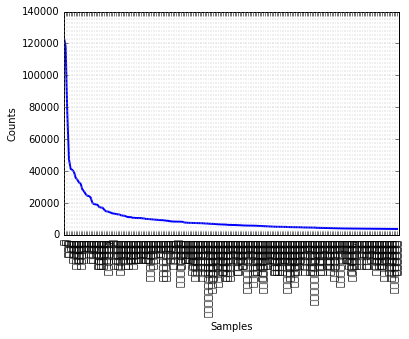

In [39]:
from nltk import FreqDist
a = FreqDist(total)
a.plot(200)

In [37]:
with open("text_dump","w") as text_dump:
    for i in a.most_common():
        text_dump.write(i[0]+"-------"+ str(i[1]))
        text_dump.write("\n")
text_dump.close()
print("Dump Completed")

Dump Completed


Dump Completed


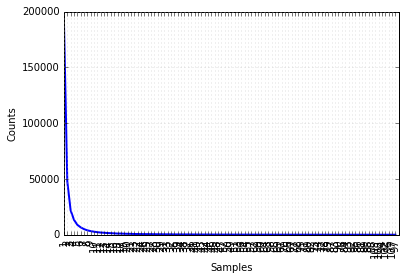

In [41]:
frequency_analysis = [i[1] for i in a.most_common()]
frequency = FreqDist(frequency_analysis)
frequency.most_common()

with open("frequency_dump","w") as text_dump:
    for i in a.most_common():
        text_dump.write(i[0]+"-------"+ str(i[1]))
        text_dump.write("\n")
text_dump.close()
print("Dump Completed")
frequency.plot(100)
#The plot shows a asymptotical decrease in frequency of words.
#There are a large number of words whose frequeny is just 1 in a huge vocab

In [46]:
print(sys.getsizeof(tokenized_sents))
#This can't be right !!

4826312


In [47]:
train = tokenized_sents[0:200]

['Nagarik/art/38427.txt',
 'Nagarik/art/38428.txt',
 'Nagarik/art/38429.txt',
 'Nagarik/art/38504.txt',
 'Nagarik/art/38508.txt',
 'Nagarik/art/38555.txt',
 'Nagarik/art/38556.txt',
 'Nagarik/art/38557.txt',
 'Nagarik/art/38558.txt',
 'Nagarik/art/38564.txt',
 'Nagarik/art/38587.txt',
 'Nagarik/art/38597.txt',
 'Nagarik/art/38598.txt',
 'Nagarik/art/38599.txt',
 'Nagarik/art/38604.txt',
 'Nagarik/art/38637.txt',
 'Nagarik/art/38638.txt',
 'Nagarik/art/38639.txt',
 'Nagarik/art/38640.txt',
 'Nagarik/art/38642.txt',
 'Nagarik/art/38644.txt',
 'Nagarik/art/38708.txt',
 'Nagarik/art/38747.txt',
 'Nagarik/art/38748.txt',
 'Nagarik/art/38749.txt',
 'Nagarik/art/38751.txt',
 'Nagarik/art/38753.txt',
 'Nagarik/art/38775.txt',
 'Nagarik/art/38802.txt',
 'Nagarik/art/38821.txt',
 'Nagarik/art/38842.txt',
 'Nagarik/art/38851.txt',
 'Nagarik/art/38889.txt',
 'Nagarik/art/38891.txt',
 'Nagarik/art/38898.txt',
 'Nagarik/art/38927.txt',
 'Nagarik/art/38932.txt',
 'Nagarik/art/38934.txt',
 'Nagarik/ar